In [1]:
import numpy as np
import matplotlib.pyplot as plt
from brian2 import *
%matplotlib inline
plt.viridis()
import os

c:\python27\lib\site-packages\Cython\Distutils\old_build_ext.py:30: UserWarning: Cython.Distutils.old_build_ext does not properly handle dependencies and is deprecated.
  "Cython.Distutils.old_build_ext does not properly handle dependencies "


In [2]:
ff_w = []
lat_w = []
spikes = {}
state = []
ff_conn = []
lat_conn = []
final_s = []
duration = 0 * second

In [3]:
seed = 7
np.random.seed(seed)
recording_filename_location = "../../synaptogenesis/"
recording_filename = str(np.random.randint(100000, 1000000))


if os.path.isfile(recording_filename_location + recording_filename + ".npz"):
    with np.load(recording_filename_location + recording_filename + ".npz")as init_data:
        print init_data.keys()
        init_ff_w = init_data['ff_w']
        init_lat_w = init_data['lat_w']
        init_ff_conn = init_data['ff_conn']
        init_lat_conn = init_data['lat_conn']
        init_s =  init_data['s']

['lat_w', 'lat_conn', 's', 'ff_w', 'ff_conn']


In [4]:
seed = 7
np.random.seed(seed)
recording_filename_location = "../../synaptogenesis/"
recording_filename = str(np.random.randint(100000, 1000000))


if os.path.isfile(recording_filename_location + recording_filename + ".npz"):
    with np.load(recording_filename_location + "save-" + recording_filename + ".npz")as init_data:
        print init_data.keys()
        ff_w = init_data['ff_w']
        lat_w = init_data['lat_w']
        spikes = init_data['spikes']
        state = init_data['state']
        ff_conn =  init_data['ff_conn']
        lat_conn = init_data['lat_conn']
        final_s = init_data['final_s'].astype(np.int32)
        duration = init_data['duration'] * second
print duration

['spikes', 'lat_w', 'simulator', 'lat_conn', 'final_s', 'state', 'rates', 'duration', 'ff_w', 'ff_conn']
200. ms


In [5]:
recording_filename

'685903'

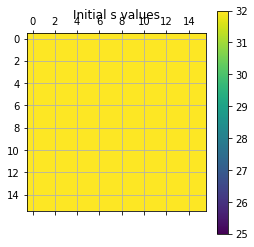

In [6]:
plt.matshow(init_s.reshape(16,16), vmin=25, vmax=32)
plt.grid(visible=True)
plt.title('Initial s values')
plt.colorbar()

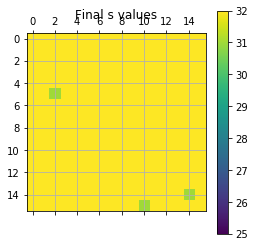

In [7]:
plt.matshow(final_s.reshape(16,16), vmin=25, vmax=32)
plt.grid(visible=True)
plt.title('Final s values')
plt.colorbar()

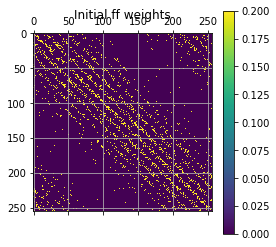

In [8]:
plt.matshow(init_ff_w.reshape(16**2,16**2), vmin=0, vmax=.2)
plt.grid(visible=True)
plt.title('Initial ff weights')
plt.colorbar()

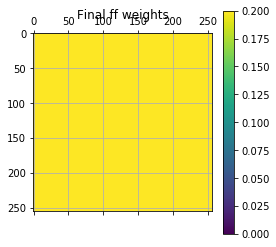

In [9]:
plt.matshow(ff_w.reshape(16**2,16**2), vmin=0, vmax=.2)
plt.grid(visible=True)
plt.title('Final ff weights')
plt.colorbar()

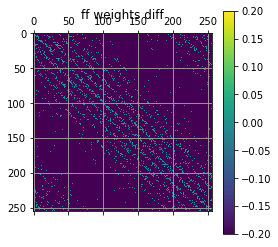

In [10]:
plt.matshow(init_ff_w.reshape(16**2,16**2) - ff_w.reshape(16**2,16**2), vmin=-.2, vmax=.2)
plt.grid(visible=True)
plt.title('ff weights diff')
plt.colorbar()

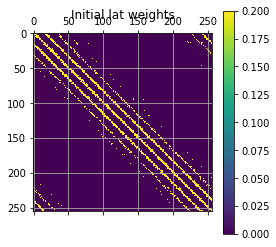

In [11]:
plt.matshow(init_lat_w.reshape(16**2,16**2), vmin=0, vmax=.2)
plt.grid(visible=True)
plt.title('Initial lat weights')
plt.colorbar()

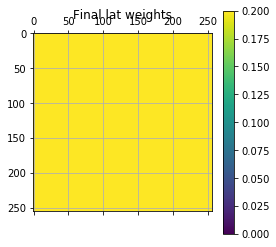

In [12]:
plt.matshow(lat_w.reshape(16**2,16**2), vmin=0, vmax=.2)
plt.grid(visible=True)
plt.title('Final lat weights')
plt.colorbar()

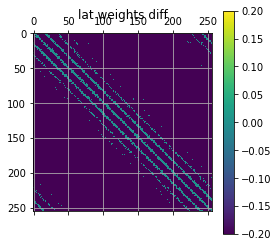

In [13]:
plt.matshow(init_lat_w.reshape(16**2,16**2)-lat_w.reshape(16**2,16**2), vmin=-.2, vmax=.2)
plt.grid(visible=True)
plt.title('lat weights diff')
plt.colorbar()

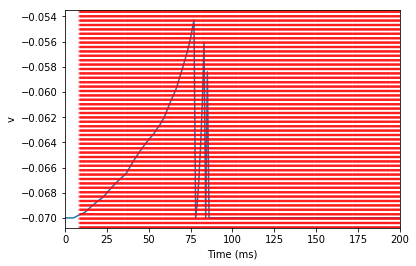

In [14]:
plt.plot(state[0])
plt.xlim(0, duration / ms)
for t in spikes.ravel()[0][0]:
    plt.axvline(t/ms, ls=':', c='r', lw=1, alpha=.3)
plt.xlabel('Time (ms)')
plt.ylabel('v')

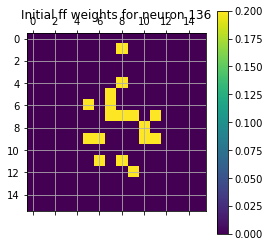

In [27]:
plt.matshow(np.asarray(init_ff_w.reshape(16**2,16**2))[136, :].reshape(16,16), vmin=0, vmax=.2)
plt.grid(visible=True)
plt.title('Initial ff weights for neuron 136')
plt.colorbar()

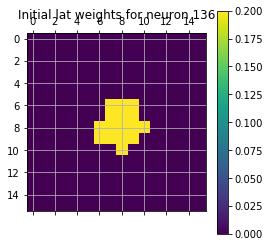

In [28]:
plt.matshow(np.asarray(init_lat_w.reshape(16**2,16**2))[136, :].reshape(16,16), vmin=0, vmax=.2)
plt.grid(visible=True)
plt.title('Initial lat weights for neuron 136')
plt.colorbar()

In [17]:
150 // 16

9

In [18]:
150 % 16

6

In [19]:
8 * 16 + 16

144

In [20]:
128 // 16

8

In [21]:
128 % 16

0

In [22]:
8 * 16 + 8

136

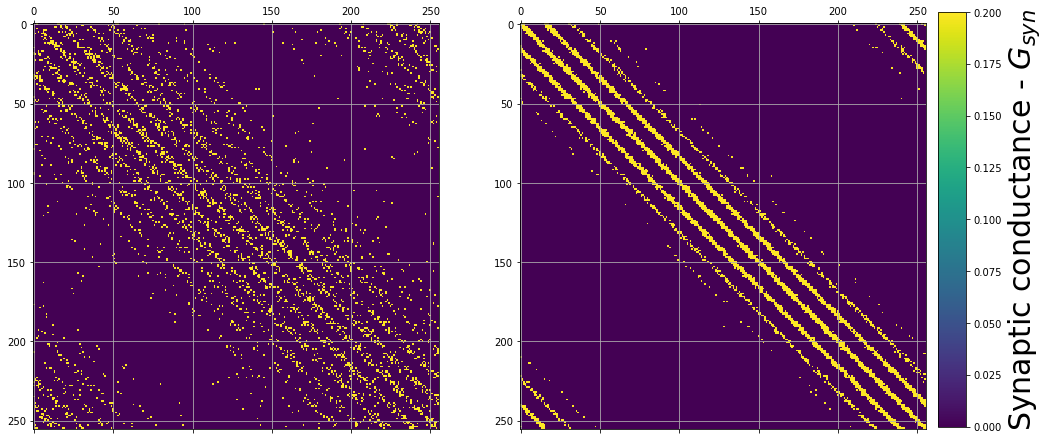

In [23]:
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(16,8))
ax1.matshow(init_ff_w.reshape(16**2,16**2), vmin=0, vmax=.2)
ax1.grid(visible=True)
# ax1.set_title("Feedforward connections", fontsize=20)
# ax1.tick_params(axis='x', colors='white')
# ax1.tick_params(axis='y', colors='white')
# ax1.set_title('Sharing Y axis')
i = ax2.matshow(init_lat_w.reshape(16**2,16**2), vmin=0, vmax=.2)
ax2.grid(visible=True)
# ax2.set_title("Lateral connections", fontsize=20)
# ax2.tick_params(axis='x', colors='white')
# ax2.tick_params(axis='y', colors='white')
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=30)

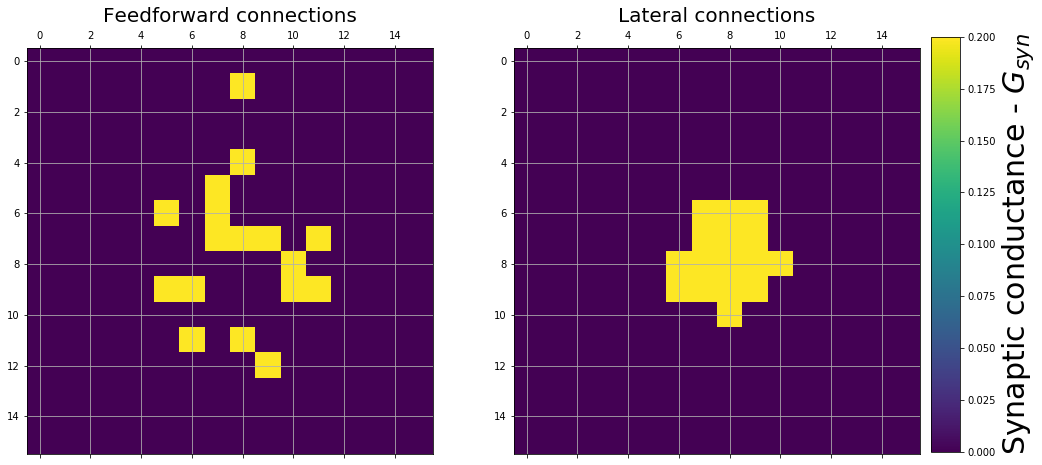

In [24]:
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(16,8))
ax1.matshow(np.asarray(init_ff_w.reshape(16**2,16**2))[136, :].reshape(16,16), vmin=0, vmax=.2)
ax1.grid(visible=True)
ax1.set_title("Feedforward connections", fontsize=20)
# ax1.tick_params(axis='x', colors='white')
# ax1.tick_params(axis='y', colors='white')
# ax1.set_title('Sharing Y axis')
i = ax2.matshow(np.asarray(init_lat_w.reshape(16**2,16**2))[136, :].reshape(16,16), vmin=0, vmax=.2)
ax2.grid(visible=True)
ax2.set_title("Lateral connections", fontsize=20)
# ax2.tick_params(axis='x', colors='white')
# ax2.tick_params(axis='y', colors='white')
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=30)

# Artificial refinement 

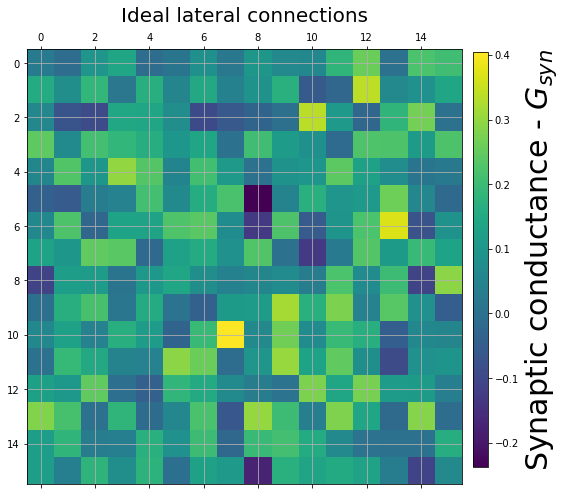

In [29]:
d = np.random.normal(.1, .1, (16,16))
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(d)
ax1.grid(visible=True)
ax1.set_title("Ideal lateral connections", fontsize=20)
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=30)

In [36]:
no_iterations = 30000

# Wiring
n = 16
N = n ** 2
S = (n, n)

s_max = 32
sigma_form_forward = 2.5
sigma_form_lateral = 1
p_form_lateral = 1
p_form_forward = 0.16
p_elim_dep = 0.0245
p_elim_pot = 1.36 * np.e ** -4
f_rew = 10 ** 4 * Hz#Hz

# Membrane
v_rest = -70 * mvolt #mV
e_ext = 0 * mvolt #V
v_thr = -54 * mvolt #mV
g_max = 0.2
tau_m = 20* ms #ms
tau_ex = 5* ms #ms
e = np.e
g = g_max
pre_t = 0 * ms


# Inputs
f_mean = 20 * Hz
f_base = 5 * Hz
f_peak = 152.8  * Hz
sigma_stim = 2
t_stim = 0.02 * second
rate = 200 * Hz

# STDP
Apre = a_plus = 0.1
b = 1.2
taupre = tau_plus = 20 * ms #ms
taupost = tau_minus = 64 * ms #ms
Apost = a_minus = (a_plus * tau_plus * b) / tau_minus

In [37]:
def distance(s, t, grid_size=S, type='euclidian'):
    '''
    Function that computes distance in a grid of neurons taking into account periodic boundry conditions.
    
    First, translate source into the center of the grid.
    Second, translate target by the same amount.
    Finally, perform desired distance computation.
    '''
    s = np.asarray(s)
    t = np.asarray(t)
    grid_size = np.asarray(grid_size)
    trans = s - (grid_size//2)
    s = np.mod(s - trans, grid_size)
    t = np.mod(t - trans, grid_size)
    if type == 'manhattan':
        return s[0] - t[0] + s[1] - t[1]
    return np.sqrt((s[0] - t[0])**2 + (s[1] - t[1])**2)

In [38]:
distro = np.zeros((16,16))
_location = (0,0)

result = []
for i in range(no_iterations):
    _random_index = np.random.randint(0, 16, 2)
    if np.random.rand() < p_form_lateral * np.e ** (-(distance(_location, _random_index)**2)/(2*sigma_form_lateral**2)):
        distro[_random_index[0], _random_index[1]] += 1

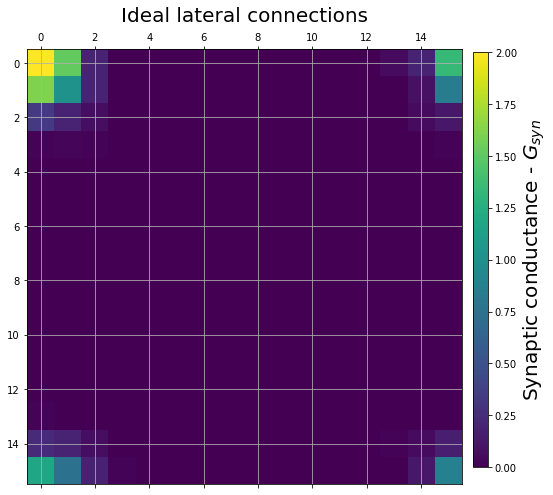

In [39]:
d = distro / np.max(distro) * 2
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(d)
ax1.grid(visible=True)
ax1.set_title("Ideal lateral connections", fontsize=20)
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=20)

In [47]:
distro = np.zeros((16,16))
_locations = 16**2

result = []
for _location in range(_locations):
    distro = np.zeros((16,16))
    for i in range(no_iterations):
        _random_index = np.random.randint(0, 16, 2)
        if np.random.rand() < p_form_lateral * np.e ** (-(distance((_location%16, _location//16), _random_index)**2)/(2*sigma_form_lateral**2)):
            distro[_random_index[0], _random_index[1]] += 1
    result.append(np.copy(distro).reshape((256)))

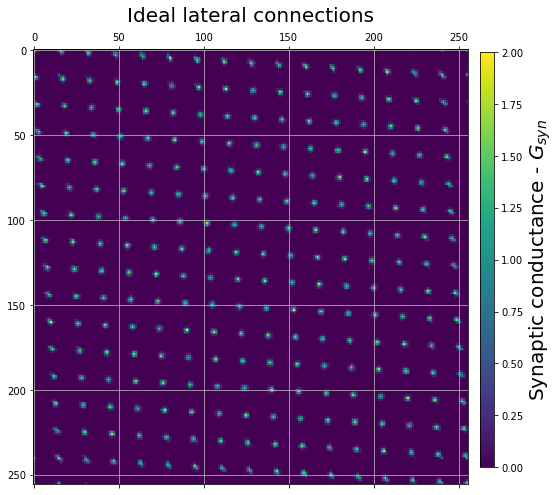

In [54]:
distro = np.asarray(result).reshape(256,256)
d = distro / np.max(distro) * 2
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(d)
ax1.grid(visible=True)
ax1.set_title("Ideal lateral connections", fontsize=20)
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=20)

In [52]:
d.shape

(256, 256)